In [1]:
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

import mplhep as hep
plt.style.use(hep.style.CMS)

import sys
import os
sys.path.append('..')
sys.path.append('../../src')
import utils

In [2]:
path = "/home/joshin/workspace-gate/DeepMuonReco/data/mu2024pu1M/test.root"
file = uproot.open(path)
tree = file["muons1stStep/event"]

In [3]:
track_qoverp = tree['track_qoverp'].array()
track_is_tracker_muon = tree['is_tracker_muon'].array()

dt_seg_pos_x = tree['dt_seg_pos_x'].array()
csc_seg_pos_x = tree['csc_seg_pos_x'].array()
seg_pos_x = ak.concatenate([dt_seg_pos_x, csc_seg_pos_x], axis=1)

rpc_hit_pos_x = tree['rpc_hit_pos_x'].array()
gem_hit_pos_x = tree['gem_hit_pos_x'].array()
hit_pos_x = ak.concatenate([rpc_hit_pos_x, gem_hit_pos_x], axis=1)

n_track = ak.num(track_qoverp)
n_tracker_muon = ak.sum(track_is_tracker_muon, axis=1)
n_dt_seg = ak.num(dt_seg_pos_x)
n_csc_seg = ak.num(csc_seg_pos_x)
n_rpc_hit = ak.num(rpc_hit_pos_x)
n_gem_hit = ak.num(gem_hit_pos_x)
n_seg = ak.num(seg_pos_x)
n_hit = ak.num(hit_pos_x)

print(n_track)
print(n_tracker_muon)
print(n_seg)
print(n_hit)

[300, 253, 333, 226, 290, 248, 370, 221, ..., 286, 177, 176, 105, 188, 205, 301]
[9, 8, 8, 22, 5, 10, 10, 10, 25, 4, 18, ..., 15, 23, 3, 17, 9, 2, 1, 16, 3, 28]
[16, 22, 21, 34, 22, 14, 17, 20, 20, 4, ..., 16, 9, 14, 11, 17, 3, 16, 8, 27]
[24, 36, 18, 27, 21, 30, 23, 24, 13, 10, ..., 20, 19, 24, 5, 22, 3, 16, 19, 20]


In [4]:
mask = (n_track > 0) & ((n_seg > 0) | (n_hit > 0))
print(mask)
print(ak.sum(mask))

[True, True, True, True, True, True, ..., True, True, True, True, True, True]
199994


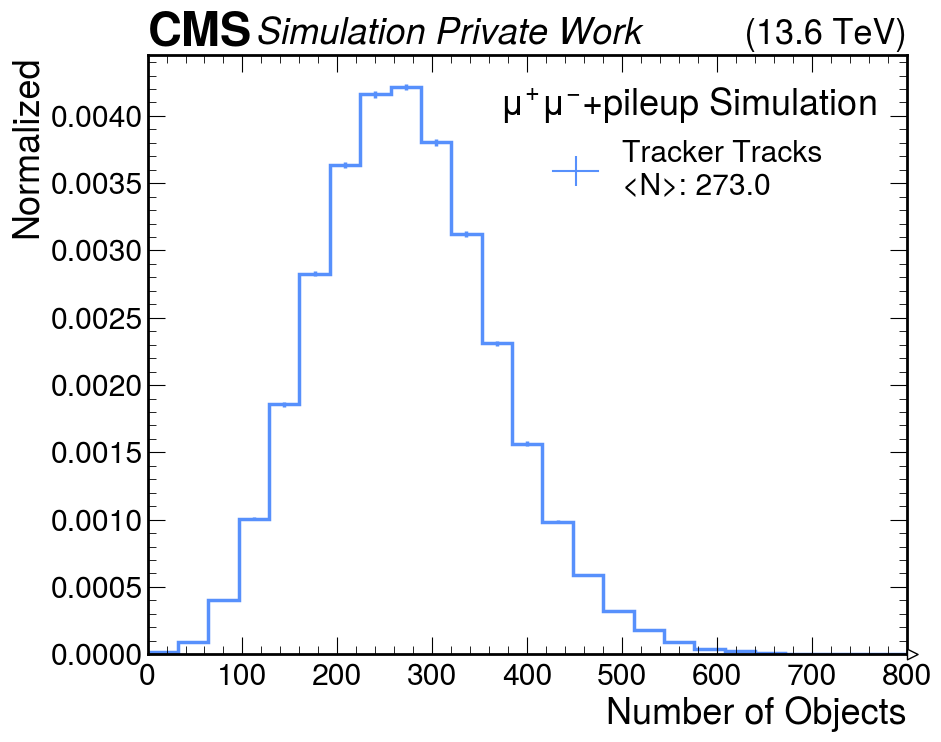

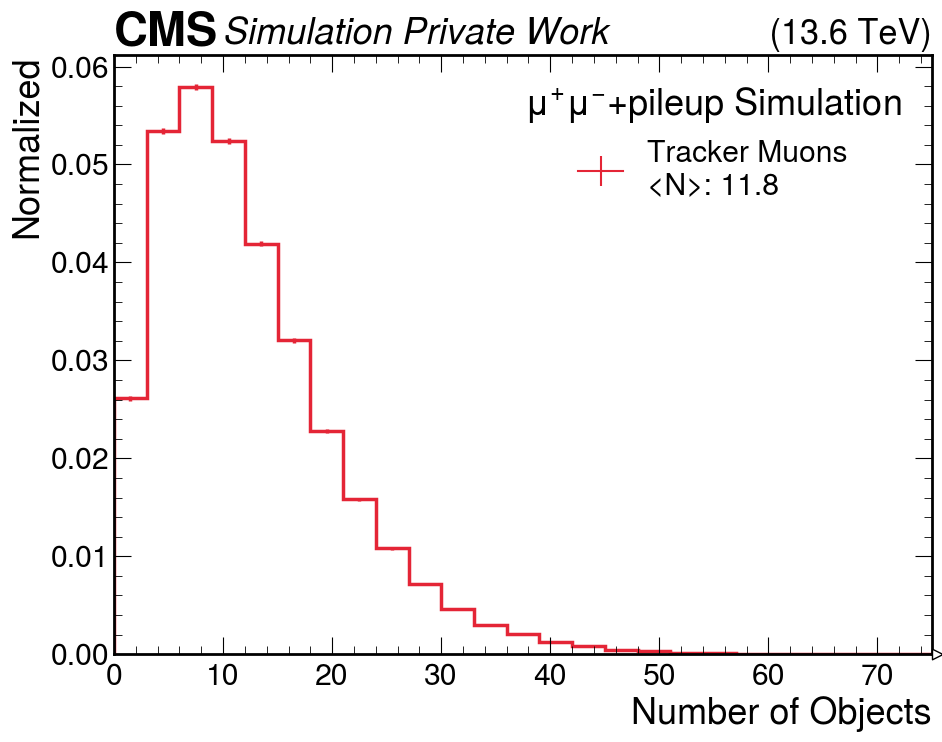

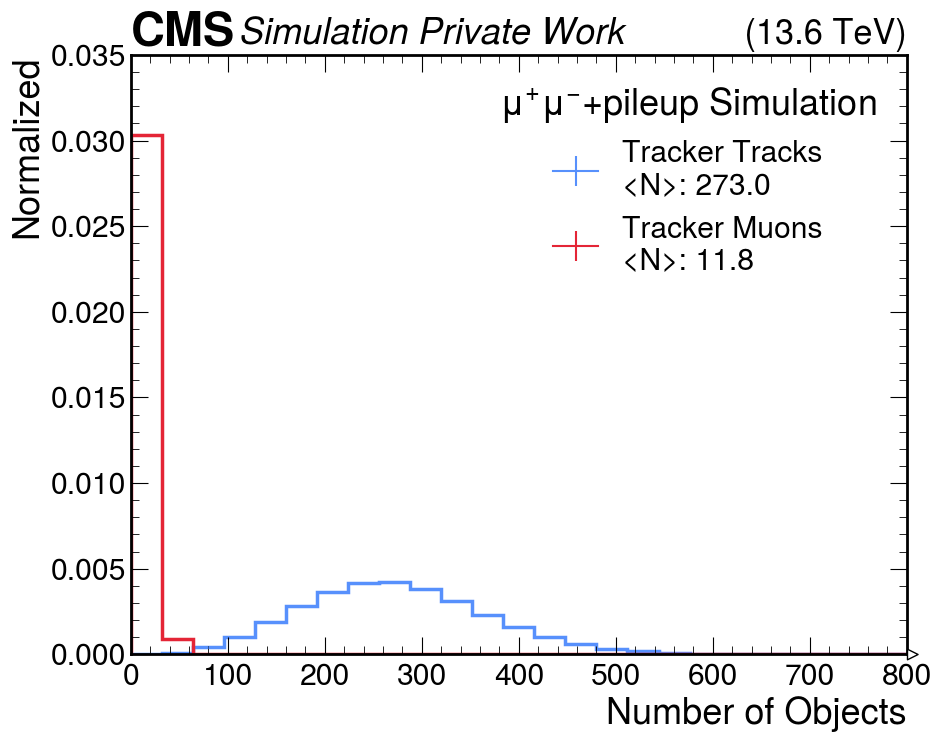

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))
ax, h_n_track = utils.plot_hist_1d(ax=ax, data=n_track, bins=(25, 0, 800), label='Tracker Tracks\n' + fr'<N>: {np.mean(n_track):.1f}', color='C0', density=True)
ax.set_xlabel(r'Number of Objects')
ax.set_ylabel('Normalized')
hep.cms.label("Private Work", ax=ax, data=False, com=13.6)
plt.legend(title=r'$\mu^{+}\mu^{-}$+pileup Simulation')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax, h_n_tracker_muon = utils.plot_hist_1d(ax=ax, data=n_tracker_muon, bins=(25, 0, 75), label='Tracker Muons\n' + fr'<N>: {np.mean(n_tracker_muon):.1f}' + f'', color='C2', density=True)
ax.set_xlabel(r'Number of Objects')
ax.set_ylabel('Normalized')
hep.cms.label("Private Work", ax=ax, data=False, com=13.6)
plt.legend(title=r'$\mu^{+}\mu^{-}$+pileup Simulation')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax, h_n_track = utils.plot_hist_1d(ax=ax, data=n_track, bins=(25, 0, 800), label='Tracker Tracks\n' + fr'<N>: {np.mean(n_track):.1f}', color='C0', density=True)
ax, h_n_tracker_muon = utils.plot_hist_1d(ax=ax, data=n_tracker_muon, bins=(25, 0, 800), label='Tracker Muons\n' + fr'<N>: {np.mean(n_tracker_muon):.1f}' + f'', color='C2', density=True)
ax.set_ylim(0, 0.035)
ax.set_xlabel(r'Number of Objects')
ax.set_ylabel('Normalized')
hep.cms.label("Private Work", ax=ax, data=False, com=13.6)
plt.legend(title=r'$\mu^{+}\mu^{-}$+pileup Simulation')
plt.tight_layout()
plt.show()


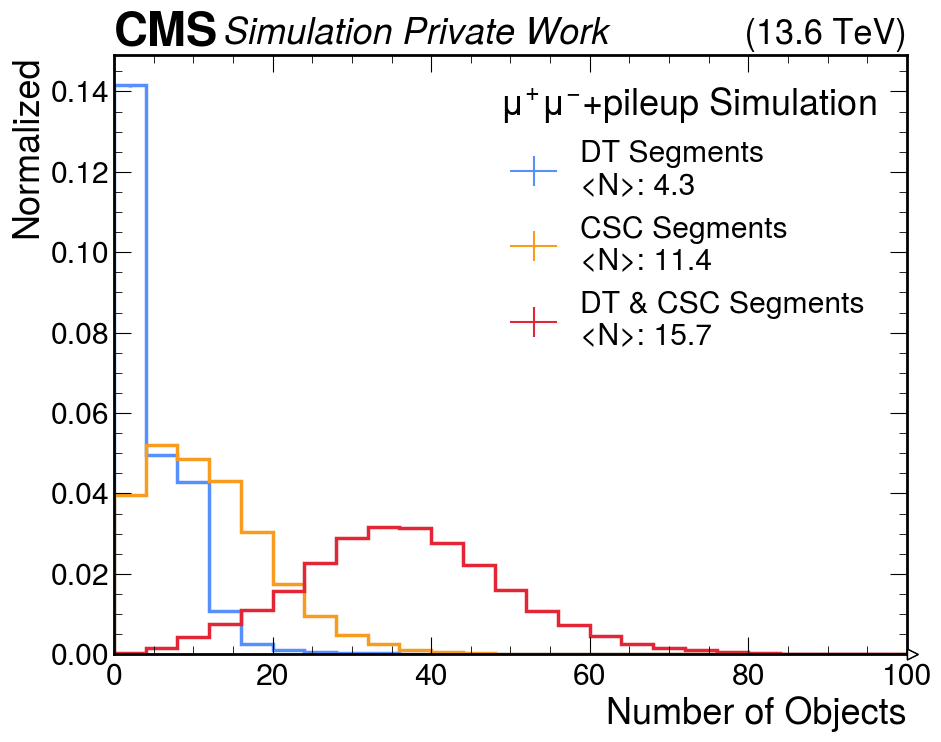

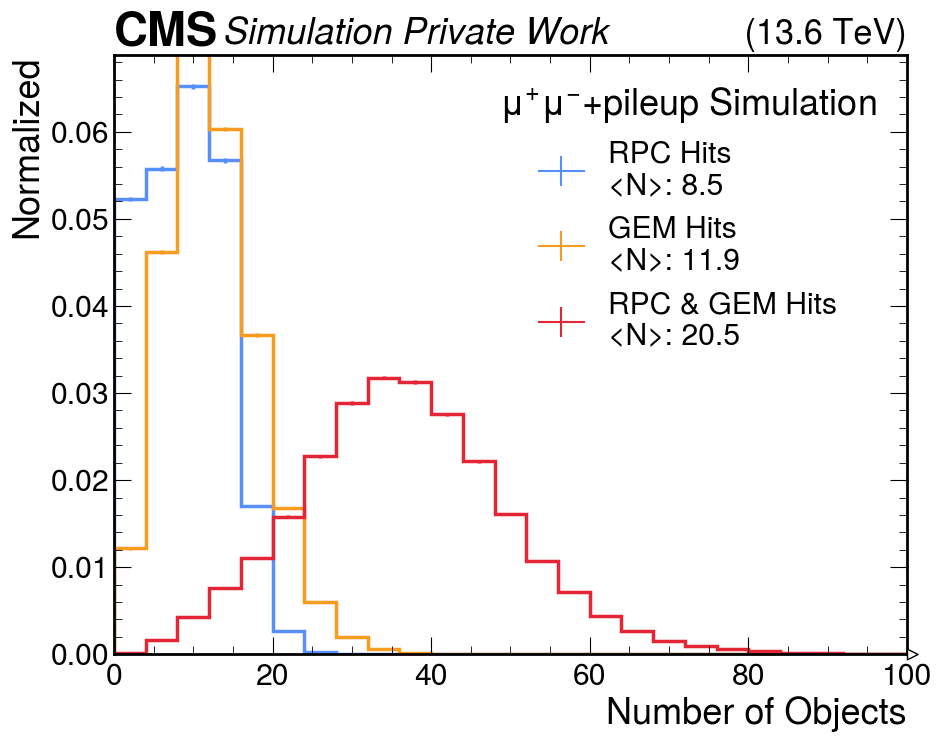

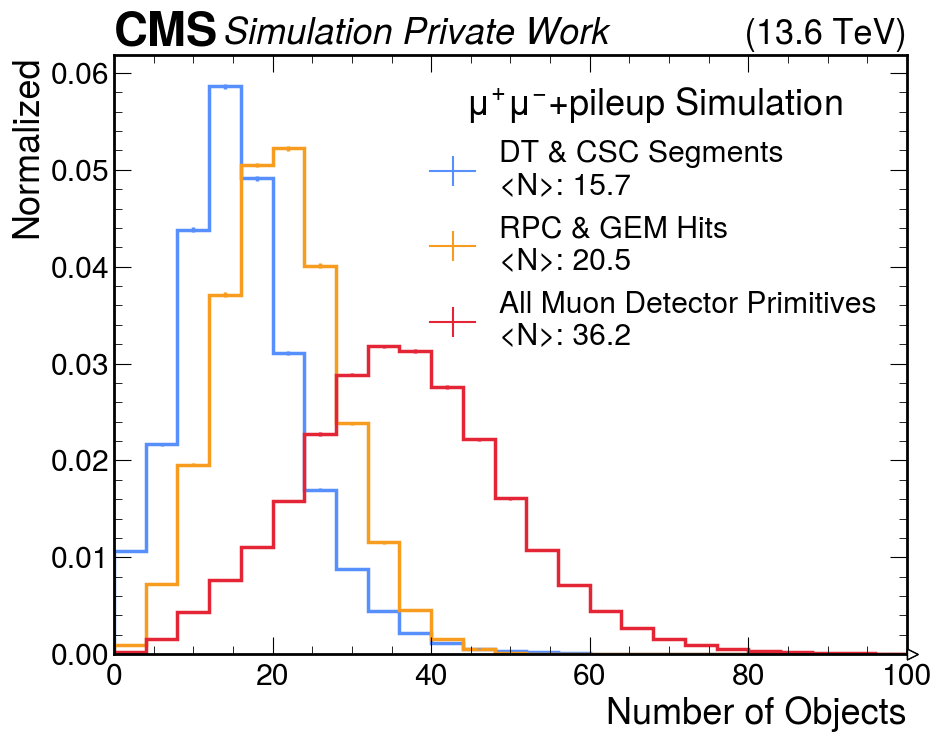

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
ax, h_n_dt_seg = utils.plot_hist_1d(ax=ax, data=n_dt_seg, bins=(25, 0, 100), label='DT Segments\n' + fr'<N>: {np.mean(n_dt_seg):.1f}', color='C0', density=True)
ax, h_n_csc_seg = utils.plot_hist_1d(ax=ax, data=n_csc_seg, bins=(25, 0, 100), label='CSC Segments\n' + fr'<N>: {np.mean(n_csc_seg):.1f}', color='C1', density=True)
ax, h_n_seg_plus_hit = utils.plot_hist_1d(ax=ax, data=n_seg+n_hit, bins=(25, 0, 100), label='DT & CSC Segments\n' + fr'<N>: {np.mean(n_seg):.1f}', color='C2', density=True)
ax.set_xlabel(r'Number of Objects')
ax.set_ylabel('Normalized')
hep.cms.label("Private Work", ax=ax, data=False, com=13.6)
plt.legend(title=r'$\mu^{+}\mu^{-}$+pileup Simulation')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax, h_n_rpc_hit = utils.plot_hist_1d(ax=ax, data=n_rpc_hit, bins=(25, 0, 100), label='RPC Hits\n' + fr'<N>: {np.mean(n_rpc_hit):.1f}', color='C0', density=True)
ax, h_n_gem_hit = utils.plot_hist_1d(ax=ax, data=n_gem_hit, bins=(25, 0, 100), label='GEM Hits\n' + fr'<N>: {np.mean(n_gem_hit):.1f}', color='C1', density=True)
ax, h_n_hit_plus_seg = utils.plot_hist_1d(ax=ax, data=n_hit+n_seg, bins=(25, 0, 100), label='RPC & GEM Hits\n' + fr'<N>: {np.mean(n_hit):.1f}', color='C2', density=True)
ax.set_xlabel(r'Number of Objects')
ax.set_ylabel('Normalized')
hep.cms.label("Private Work", ax=ax, data=False, com=13.6)
plt.legend(title=r'$\mu^{+}\mu^{-}$+pileup Simulation')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax, h_n_seg = utils.plot_hist_1d(ax=ax, data=n_seg, bins=(25, 0, 100), label='DT & CSC Segments\n' + fr'<N>: {np.mean(n_seg):.1f}', color='C0', density=True)
ax, h_n_hit = utils.plot_hist_1d(ax=ax, data=n_hit, bins=(25, 0, 100), label='RPC & GEM Hits\n' + fr'<N>: {np.mean(n_hit):.1f}', color='C1', density=True)
ax, h_n_seg_plus_hit = utils.plot_hist_1d(ax=ax, data=n_seg+n_hit, bins=(25, 0, 100), label='All Muon Detector Primitives\n' + fr'<N>: {np.mean(n_seg+n_hit):.1f}', color='C2', density=True)
ax.set_xlabel(r'Number of Objects')
ax.set_ylabel('Normalized')
hep.cms.label("Private Work", ax=ax, data=False, com=13.6)
plt.legend(title=r'$\mu^{+}\mu^{-}$+pileup Simulation')
plt.tight_layout()
plt.show()

In [7]:
track_qoverp          = ak.to_numpy(ak.flatten(tree["track_qoverp"].array()))
track_lambda          = ak.to_numpy(ak.flatten(tree["track_lambda"].array()))
track_phi             = ak.to_numpy(ak.flatten(tree["track_phi"].array()))
track_dxy             = ak.to_numpy(ak.flatten(tree["track_dxy"].array()))
track_dsz             = ak.to_numpy(ak.flatten(tree["track_dsz"].array()))
track_is_tracker_muon = ak.to_numpy(ak.flatten(tree["is_tracker_muon"].array()))

track_pt = utils.calc_track_pt(track_qoverp, track_lambda)
track_eta = utils.calc_track_eta(track_lambda)

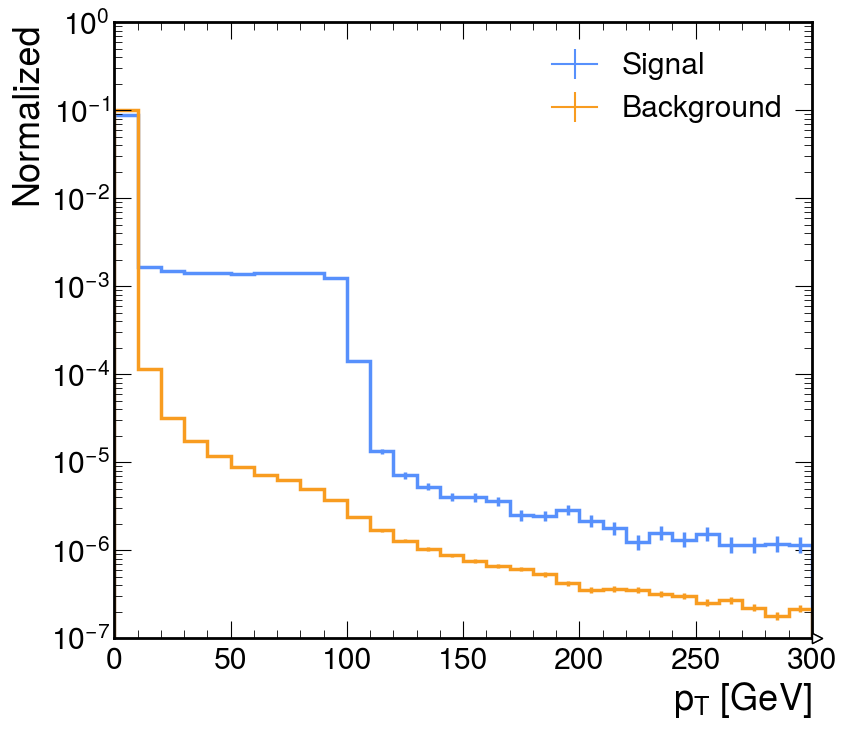

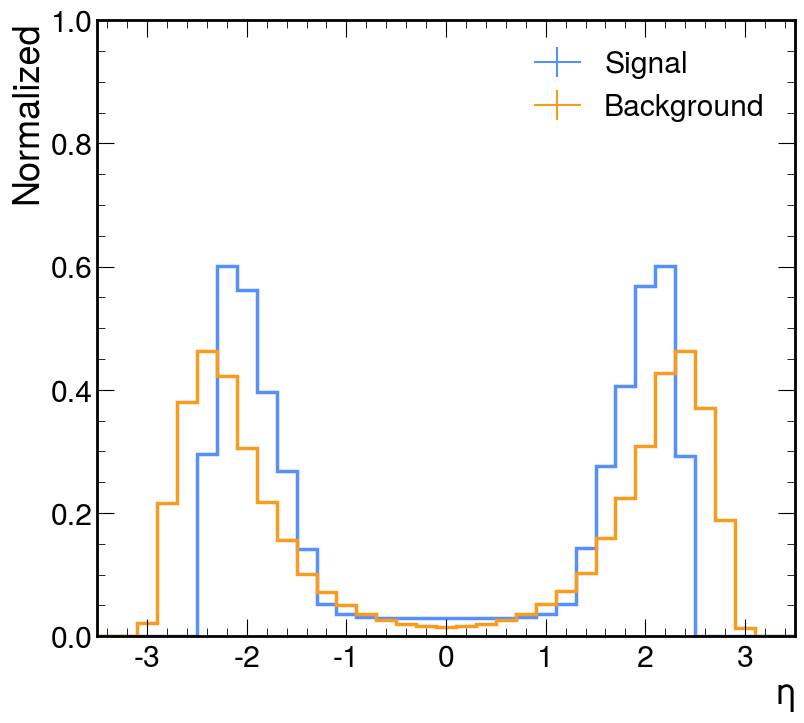

In [8]:
fig, ax = plt.subplots(figsize=(9, 8))
ax, h_tracker_muon = utils.plot_hist_1d(ax=ax, data=track_pt[track_is_tracker_muon], bins=(30, 0, 300),
                                        label='Signal', color='C0', density=True)
ax, h_non_tracker_muon = utils.plot_hist_1d(ax=ax, data=track_pt[~track_is_tracker_muon], bins=(30, 0, 300),
                                            label='Background', color='C1', density=True)

ax.set_ylim(1e-7, 1)
ax.set_yscale('log')
ax.set_xlabel(r'$p_{T}$ [GeV]')
ax.set_ylabel('Normalized')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(9, 8))
ax, h_tracker_muon = utils.plot_hist_1d(ax=ax, data=track_eta[track_is_tracker_muon], bins=(35, -3.5, 3.5),
                                        label='Signal', color='C0', density=True)
ax, h_non_tracker_muon = utils.plot_hist_1d(ax=ax, data=track_eta[~track_is_tracker_muon], bins=(35, -3.5, 3.5),
                                            label='Background', color='C1', density=True)
ax.set_ylim(0, 1)
#ax.set_yscale('log')
ax.set_xlabel(r'$\eta$')
ax.set_ylabel('Normalized')
plt.legend()
plt.show()                                        

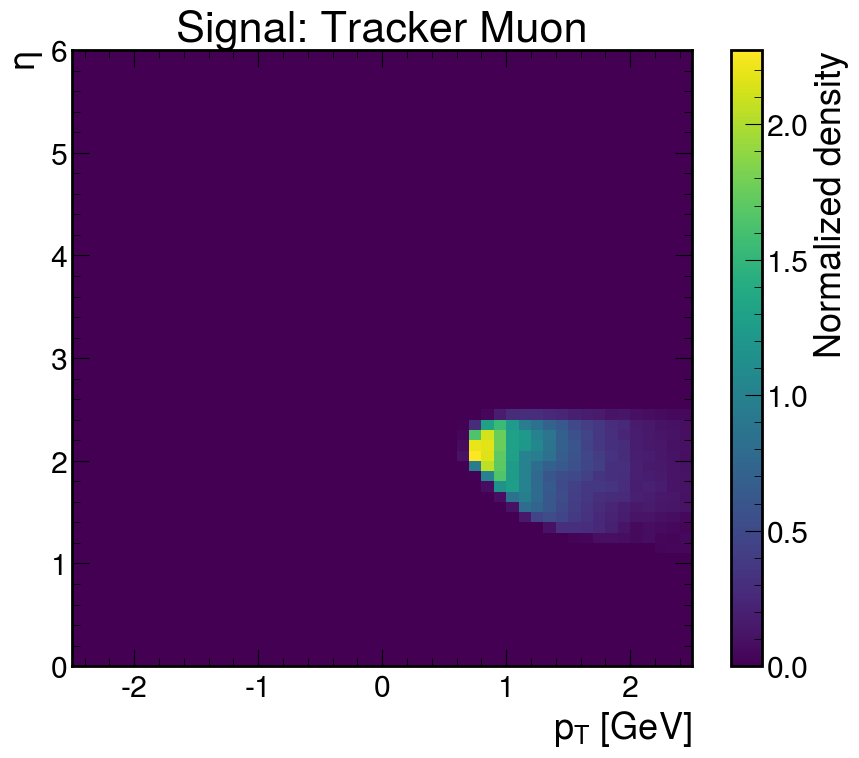

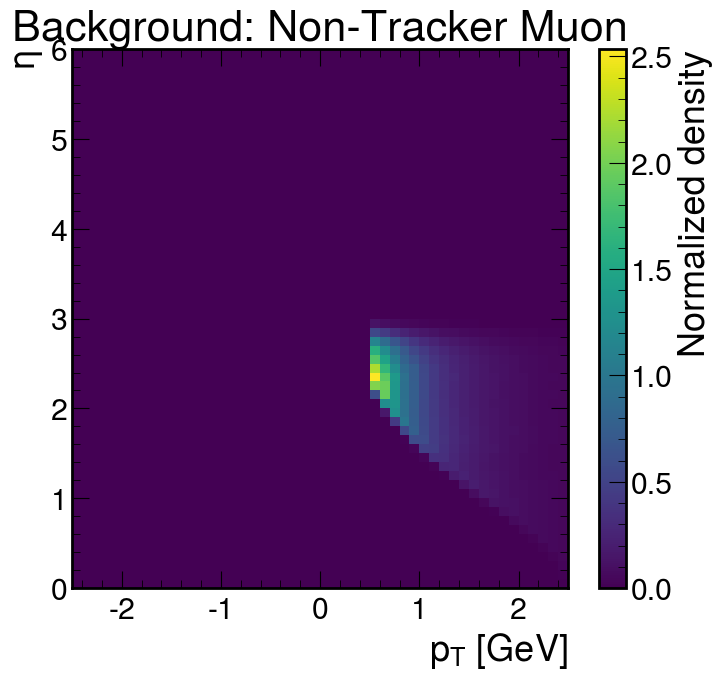

In [11]:
pt_bins = np.linspace(0, 6, 61)        # pT: 0 ~ 6 GeV
eta_bins = np.linspace(-2.5, 2.5, 51)  # η: -2.5 ~ 2.5

fig, ax = plt.subplots(figsize=(10, 8))
h_signal = ax.hist2d(
    track_pt[track_is_tracker_muon],
    track_eta[track_is_tracker_muon],
    bins=[eta_bins, pt_bins],
    density=True,
)
plt.colorbar(h_signal[3], ax=ax, label='Normalized density')
ax.set_xlabel(r'$p_{T}$ [GeV]')
ax.set_ylabel(r'$\eta$')
ax.set_title('Signal: Tracker Muon')
plt.show()

fig, ax = plt.subplots(figsize=(8, 7))
h_background = ax.hist2d(
    track_pt[~track_is_tracker_muon],
    track_eta[~track_is_tracker_muon],
    bins=[eta_bins, pt_bins],
    density=True,
)
plt.colorbar(h_background[3], ax=ax, label='Normalized density')
ax.set_xlabel(r'$p_{T}$ [GeV]')
ax.set_ylabel(r'$\eta$')
ax.set_title('Background: Non-Tracker Muon')
plt.show()

/home/joshin/micromamba/envs/deepmuonreco-py312/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


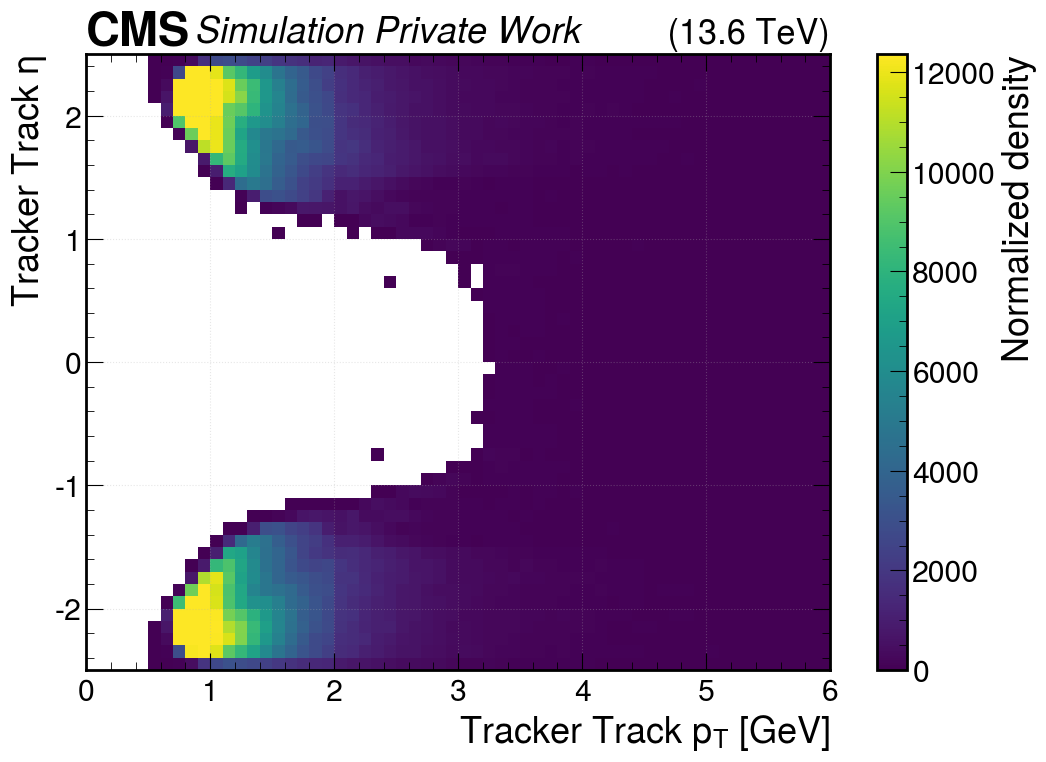

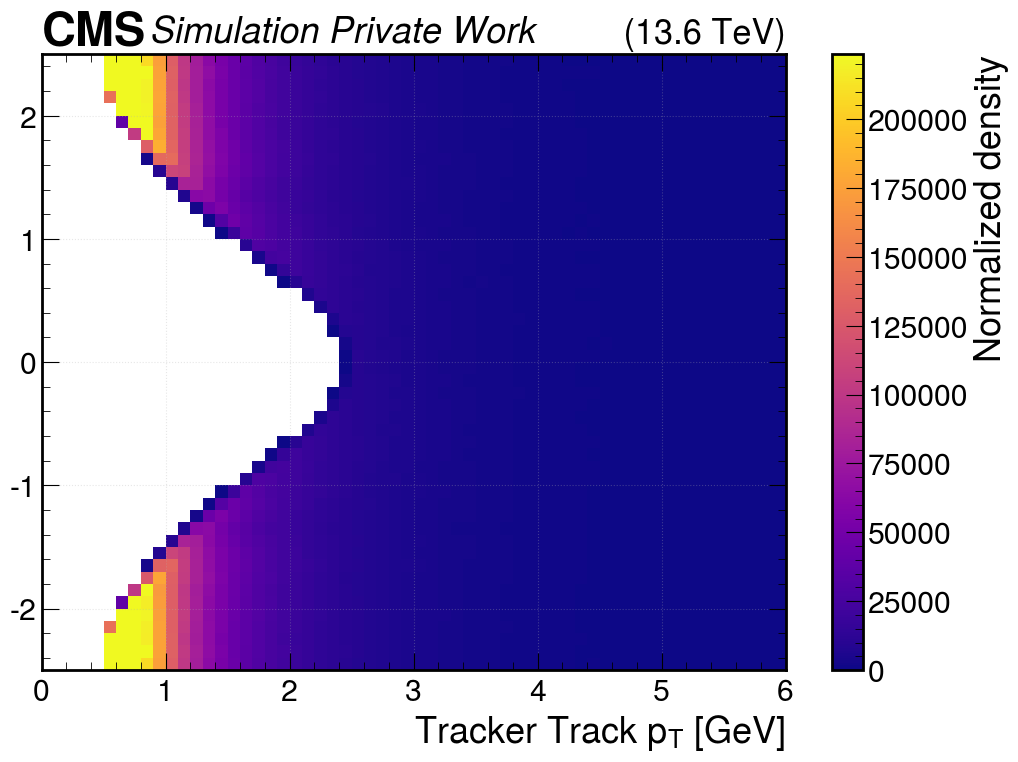

In [24]:
valid = np.isfinite(track_pt) & np.isfinite(track_eta)
track_pt = track_pt[valid]
track_eta = track_eta[valid]
track_is_tracker_muon = track_is_tracker_muon[valid]

# 2) bin 정의
eta_bins = np.linspace(-2.5, 2.5, 51)  # η: -2.5 ~ 2.5
pt_bins = np.linspace(0, 6, 61)        # pT: 0 ~ 6 GeV

# 3) 2D histogram 계산
H_signal, _, _ = np.histogram2d(
    track_pt[track_is_tracker_muon],
    track_eta[track_is_tracker_muon],
    bins=[pt_bins, eta_bins],
    density=False
)

H_signal_masked = np.ma.masked_where(H_signal == 0, H_signal)


H_background, _, _ = np.histogram2d(
    track_pt[~track_is_tracker_muon],
    track_eta[~track_is_tracker_muon],
    bins=[pt_bins, eta_bins],
    density=False
)

H_background_masked = np.ma.masked_where(H_background == 0, H_background)

# 4) Plot 설정
fig, ax = plt.subplots(figsize=(12, 8))
plt.style.use(hep.style.CMS)

# (a) Signal
im = ax.pcolormesh(
    pt_bins, eta_bins, H_signal_masked.T,
    shading='auto', cmap='viridis',
    vmin=0.0, vmax=np.nanpercentile(H_signal_masked, 99)  # outlier 안정화
)
ax.set_xlabel(r"Tracker Track $p_T$ [GeV]")
ax.set_ylabel(r"Tracker Track $\eta$")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Normalized density")
hep.cms.label("Private Work", data=False, com=13.6, ax=ax)
ax.grid(alpha=0.3)

fig, ax = plt.subplots(figsize=(12, 8))
im = ax.pcolormesh(
    pt_bins, eta_bins, H_background_masked.T,
    shading='auto', cmap='plasma',
    vmin=0.0, vmax=np.nanpercentile(H_background_masked, 99)
)
ax.set_xlabel(r"Tracker Track $p_T$ [GeV]")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Normalized density")
hep.cms.label("Private Work", data=False, com=13.6, ax=ax)
ax.grid(alpha=0.3)

plt.show()